<h1 style="font-family:tahoma; color:brown; font-size:35px;" > IMPORTING LIBRARIES </h1

In [1]:
import docx , regex as re , pandas as pd , seaborn as sns , matplotlib.pyplot as plt , warnings
warnings.filterwarnings('ignore')

<h1 style="font-family:tahoma; color:brown; font-size:35px;" > LOADING DATA </h1

In [2]:
docs = [ docx.Document('60013398147904651847.docx') , docx.Document('60013398147904641572.docx') , 
      docx.Document('60013398147904217059.docx'), docx.Document('60013398147904617853.docx') ]

<h1 style="font-family:tahoma; color:brown; font-size:35px;" > EXTRACTING TEXT FROM DOCS </h1

In [3]:
full_text = ''

In [4]:
for doc in docs:
    for table in doc.tables:
        for row in table.rows:
            full_text = ' '.join([full_text , ' '.join([cell.text for cell in row.cells])])

In [5]:
full_text

' Off-Net(Mobile) 00:00:00  00:00:00  0.00  Premium / ISD & IR Calling 00:00:00  00:00:00  0.00  SMS 0  0  0.00  Data 28.109 GB  0.000 GB  0.00  4G Data/WIFI 28.109 GB  0.000 GB  0.00  5G Data 0.000 GB  0.000 GB  0.00  VAS 0  0  0.00  4 Other Purchases      0.00 5  Credit & Adjustments      0.00 Recharge Option         Jio Self Care  Jio Store   \n1 Data  \nCount \nBilled Usage\n(GB) \nFree Usage\n(GB) \nChargeable Usage\n(GB) \nAmount(`) 1.1 Usage in India      1.1.1 4G Data 115 28.109 27.910 0.000 0.00  Subtotal 115 28.109 27.910 0.000 0.00         Total 115 28.109 27.910 0.000 0.00 \n2 Voice\n\n2.1 \n\n\n\nUsage in India \nCount \nBilled Usage (hh:mm:ss) \nFree Usage (hh:mm:ss) \nChargeable Usage\n(hh:mm:ss) \nAmount(`) 2.1.1 Local-On-Net/Off-Net(LL) 50 01:03:49 00:00:00 00:00:00 0.00 2.1.2 Local-Off-Net(Mobile) 47 05:05:20 00:00:00 00:00:00 0.00  Subtotal 97 06:09:09 00:00:00 00:00:00 0.00         Total 97 06:09:09 00:00:00 00:00:00 0.00 \nNo. \nStart Date & Time \nEnd Date & Time 

<h1 style="font-family:tahoma; color:brown; font-size:35px;" > EXTRACTING DATA FROM THE EXTRACTED TEXT </h1

In [6]:
df = pd.DataFrame({"numb":[] , "minutes" : [] , "date_":[] , 'time_':[]})

<h1 style="font-family:tahoma; color:blue; font-size:15px;" > EXTRACTING PHONE NUMBERS </h1

In [7]:
df.numb = re.findall(r'\d{2}(\d{10})\s+\d+', full_text)

<h1 style="font-family:tahoma; color:blue; font-size:15px;" > EXTRACTING TALKTIME </h1

In [8]:
df.minutes = re.findall(r'\d{2}\d{10}\s+(\d+)', full_text)

<h1 style="font-family:tahoma; color:blue; font-size:15px;" > EXTRACTING CALL DATE </h1

In [9]:
df.date_ = re.findall(r'(\d{2}-[a-zA-Z]{3}-\d{2})\s+\d{2}:\d{2}:\d{2}\s+\d{12}\s+\d+', full_text)

<h1 style="font-family:tahoma; color:blue; font-size:15px;" > EXTRACTING CALL TIME </h1

In [10]:
df.time_ = re.findall(r'\d{2}-[a-zA-Z]{3}-\d{2}\s+(\d{2}:\d{2}:\d{2})\s+\d{12}\s+\d+', full_text)

In [11]:
df.head()

,numb,minutes,date_,time_
0,7815829778,158,02-MAY-24,12:02:51
1,7286992293,223,02-MAY-24,08:51:54
2,7286992293,22,02-MAY-24,08:51:11
3,6300614046,5,01-MAY-24,19:41:21
4,6300614046,85,01-MAY-24,19:38:23


In [12]:
df.dtypes

numb       object
minutes    object
date_      object
time_      object
dtype: object

In [13]:
df.numb = df.numb.astype('int64')
df.minutes = df.minutes.astype('int64')
df.date_ = pd.to_datetime(df.date_)
df.time_ = pd.to_datetime(df['time_'], format='%H:%M:%S').dt.time

<h1 style="font-family:tahoma; color:blue; font-size:15px;" > CONVERTING TALKTIME INTO MINUES FROM SECONDS  </h1

In [14]:
df.minutes = round(df.minutes/60,3)

In [15]:
df.head()

,numb,minutes,date_,time_
0,7815829778,2.633,2024-05-02,12:02:51
1,7286992293,3.717,2024-05-02,08:51:54
2,7286992293,0.367,2024-05-02,08:51:11
3,6300614046,0.083,2024-05-01,19:41:21
4,6300614046,1.417,2024-05-01,19:38:23


In [16]:
df = df.sort_values(by = ['date_','time_']).reset_index(drop=True)

In [17]:
df.head()

,numb,minutes,date_,time_
0,7032827221,0.567,2024-01-19,10:04:30
1,7032827221,7.867,2024-01-19,10:05:44
2,7815829778,2.700,2024-01-19,14:31:30
3,7032827221,11.900,2024-01-19,17:49:58
4,6302833867,0.133,2024-01-19,18:10:15


In [19]:
indexes = df[df.numb.isin([7815829778,7396132905, 7330207185, 9550392847, 9949607133, 9849316797,9381307267])].index

In [20]:
df.drop(index= indexes , inplace=True)

<h1 style="font-family:tahoma; color:blue; font-size:15px;" > FINDING THE CONTACT NAMES </h1>

In [21]:
c = pd.read_csv('total_call_time',usecols=[1,2])
c.head()

,numb,name
0,7815829778,javeed chacha
1,7842639348,jafar php
2,7032827221,jaybun bee
3,9542617386,jafar php
4,9160663926,irfan mattan


In [22]:
df = pd.merge(df, c[['numb', 'name']], on='numb')
df.head()

,numb,minutes,date_,time_,name
0,7032827221,0.567,2024-01-19,10:04:30,jaybun bee
1,7032827221,7.867,2024-01-19,10:05:44,jaybun bee
2,7032827221,11.900,2024-01-19,17:49:58,jaybun bee
3,7032827221,8.533,2024-01-19,18:19:15,jaybun bee
4,7032827221,1.700,2024-01-23,10:47:10,jaybun bee


<h1 style="font-family:tahoma; color:brown; font-size:25px;" > NUMBER OF CALLS </h1

In [23]:
count = df.groupby('name')[["name"]].count().rename(columns = {'name':'count'}).sort_values(by = 'count',ascending=False)
count.head()

,count
name,
jafar php,204
jaybun bee,77
sheik imran,54
ambika,45
jafar php,38


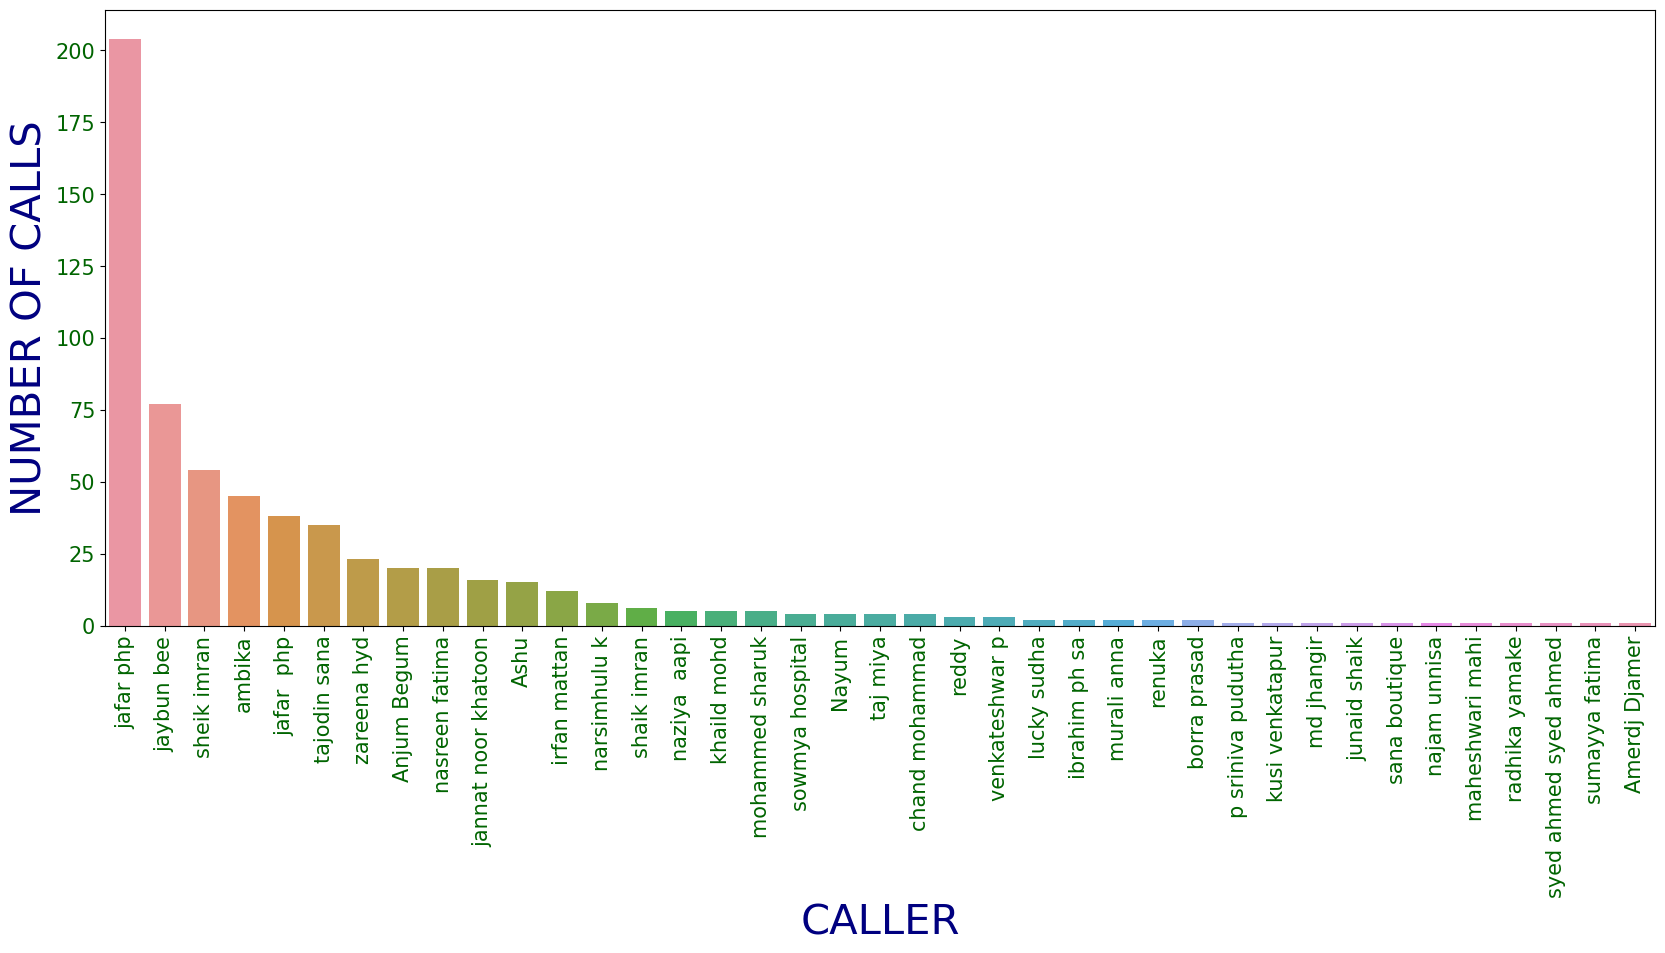

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(x = df.name  ,  order = df["name"].value_counts().index)
plt.xticks(rotation = 90 , color = 'darkgreen' , fontsize = 15)
plt.yticks( color = 'darkgreen' , fontsize = 15)
plt.xlabel("CALLER",fontsize = 30 , color = 'navy')
plt.ylabel("NUMBER OF CALLS",fontsize = 30, color = 'navy')
plt.show()

<h1 style="font-family:tahoma; color:brown; font-size:25px;" > TALKTIME </h1

In [25]:
taktime = df.groupby(['name'])[['minutes']].sum()

In [26]:
taktime.minutes = taktime['minutes'].apply(lambda x: float(round(float(x),2)))

In [27]:
taktime.sort_values(by = 'minutes' ,ascending=False).head()

,minutes
name,
jafar php,1758.43
jaybun bee,524.42
jafar php,159.52
irfan mattan,132.41
tajodin sana,112.40


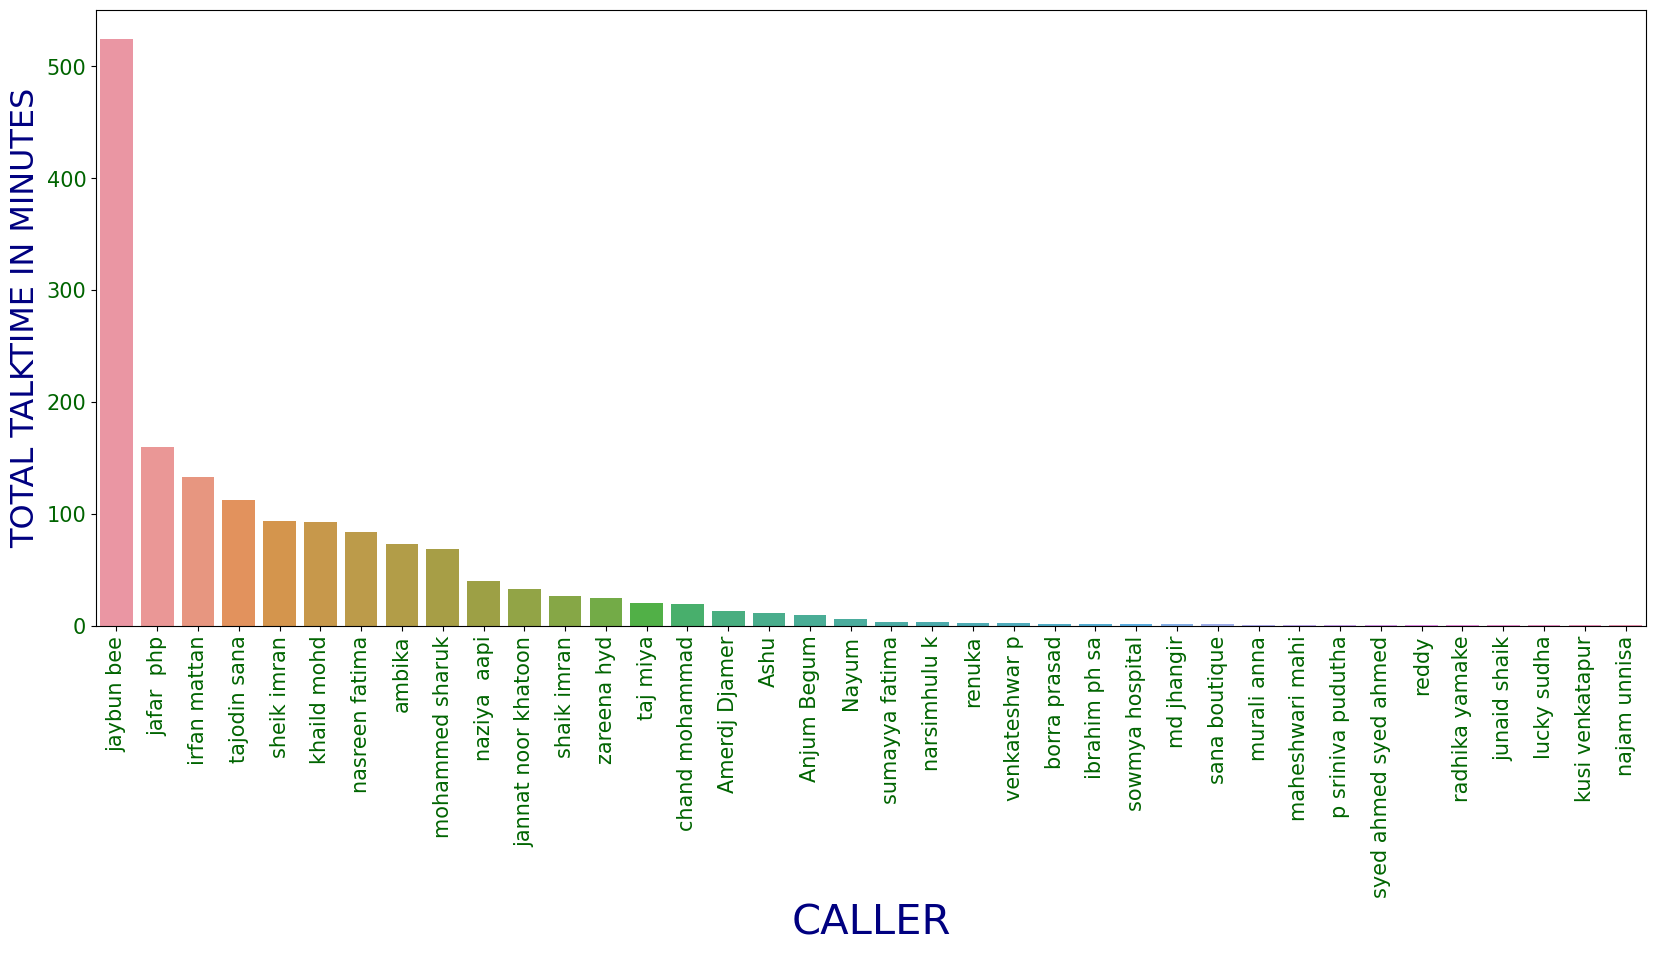

In [30]:
plt.figure(figsize=(20,8))
sns.barplot(x = taktime.sort_values(by = 'minutes' ,ascending=False).iloc[1:,:].minutes.index  ,  y = taktime.sort_values(by = 'minutes' ,ascending=False).iloc[1:,:].minutes)
plt.xticks(rotation = 90 , color = 'darkgreen' , fontsize = 15)
plt.yticks( color = 'darkgreen' , fontsize = 15)
plt.xlabel("CALLER",fontsize = 30 , color = 'navy')
plt.ylabel("TOTAL TALKTIME IN MINUTES",size = 23, color = 'navy')
plt.show()